<a href="https://colab.research.google.com/github/Mburu-Elvis/NairobiRentPrices/blob/main/eda_housing_nairobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
url = "https://raw.githubusercontent.com/Mburu-Elvis/NairobiRentPrices/main/housing_data.csv"

In [80]:
data = pd.read_csv(url, sep=",")
data_overview = data.iloc[:120000, :]

In [81]:
data.head()

,City,Location,Bedrooms,Bathrooms,Parking,Price
0,Machakos,Syokimau/Mulolongo,4.0,4.0,NaN,100000.0
1,Westlands,Runda,3.0,3.0,2.0,180000.0
2,Nairobi,Spring Valley,5.0,5.0,4.0,380000.0
3,Nairobi,Thindigua,3.0,3.0,NaN,55000.0
4,Nairobi,Westlands,4.0,4.0,4.0,265000.0


## Exploratory Data Analysis

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       206389 non-null  object 
 1   Location   206386 non-null  object 
 2   Bedrooms   225193 non-null  float64
 3   Bathrooms  221926 non-null  float64
 4   Parking    107061 non-null  float64
 5   Price      230942 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


### City

In [83]:
data['City'].value_counts()

 Nairobi       190877
Nairobi          8075
Westlands        1143
 Mombasa          464
Nyali             232
                ...  
savanah             1
Golf's              1
Deliverance         1
EASTATE             1
Fig                 1
Name: City, Length: 448, dtype: int64

In [84]:
data['City'] = data['City'].str.strip(' ')

In [85]:
for i in range(0, 231057):
  if data['City'].iloc[i] == 'Westlands':
    data.at[i, 'City'] = 'Nairobi'
    data.at[i, 'Location'] = 'Westlands'


In [86]:
data['City'].value_counts()

Nairobi     200174
Mombasa        477
Nyali          233
West           182
B              174
             ...  
EASTATE          1
Shopping         1
Mugumo           1
Trm              1
centre           1
Name: City, Length: 429, dtype: int64

In [87]:
data.head()

,City,Location,Bedrooms,Bathrooms,Parking,Price
0,Machakos,Syokimau/Mulolongo,4.0,4.0,NaN,100000.0
1,Nairobi,Westlands,3.0,3.0,2.0,180000.0
2,Nairobi,Spring Valley,5.0,5.0,4.0,380000.0
3,Nairobi,Thindigua,3.0,3.0,NaN,55000.0
4,Nairobi,Westlands,4.0,4.0,4.0,265000.0


In [88]:
data['City'].fillna('Nairobi', inplace=True)

In [89]:
data['City'].value_counts()

Nairobi     224842
Mombasa        477
Nyali          233
West           182
B              174
             ...  
EASTATE          1
Shopping         1
Mugumo           1
Trm              1
centre           1
Name: City, Length: 429, dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       231057 non-null  object 
 1   Location   206386 non-null  object 
 2   Bedrooms   225193 non-null  float64
 3   Bathrooms  221926 non-null  float64
 4   Parking    107061 non-null  float64
 5   Price      230942 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


In [91]:
data.duplicated().sum()

180791

In [92]:
data.nunique().sum()

4023

In [93]:
data.describe()

,Bedrooms,Bathrooms,Parking,Price
count,225193.000000,2.219260e+05,1.070610e+05,2.309420e+05
mean,13.236788,1.256053e+02,2.430523e+01,8.868090e+05
std,1573.673088,4.934712e+04,3.502559e+03,5.224872e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,2.000000e+00,2.000000e+00,8.000000e+04
50%,3.000000,3.000000e+00,2.000000e+00,1.500000e+05
75%,4.000000,4.000000e+00,3.000000e+00,2.800000e+05
max,360000.000000,2.323232e+07,1.121111e+06,1.550006e+10


## Location


In [94]:
data['Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Location
Non-Null Count   Dtype 
--------------   ----- 
206386 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [95]:
data['Location'] = data['Location'].str.strip(' ,')

In [96]:
data['Location'].value_counts()

Lavington     35962
Kilimani      26167
Westlands     25451
Kileleshwa    20980
Runda         12770
              ...  
ONGATA            1
Muthithi          1
Green Park        1
State             1
GREENFIELD        1
Name: Location, Length: 742, dtype: int64

In [97]:
data['Location'].mode()

0    Lavington
Name: Location, dtype: object

In [98]:
impute_value = data['Location'].mode().iloc[0]

data['Location'].fillna(impute_value, inplace=True)

In [156]:
data['Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Location
Non-Null Count   Dtype 
--------------   ----- 
231057 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


## Bedrooms

In [99]:
data['Bedrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bedrooms
Non-Null Count   Dtype  
--------------   -----  
225193 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [100]:
data['Bedrooms'].isna().sum()

5864

In [101]:
data['Bedrooms'].describe()

count    225193.000000
mean         13.236788
std        1573.673088
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max      360000.000000
Name: Bedrooms, dtype: float64

In [102]:
data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       231057 non-null  object 
 1   Location   231057 non-null  object 
 2   Bedrooms   231057 non-null  float64
 3   Bathrooms  221926 non-null  float64
 4   Parking    107061 non-null  float64
 5   Price      230942 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


<Axes: >

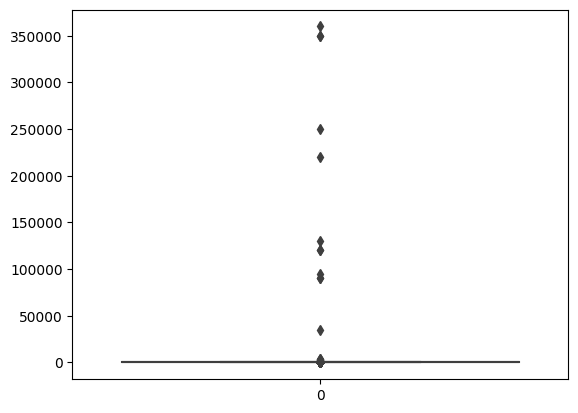

In [104]:
sns.boxplot(data['Bedrooms'])

In [105]:
from matplotlib.ticker import ScalarFormatter

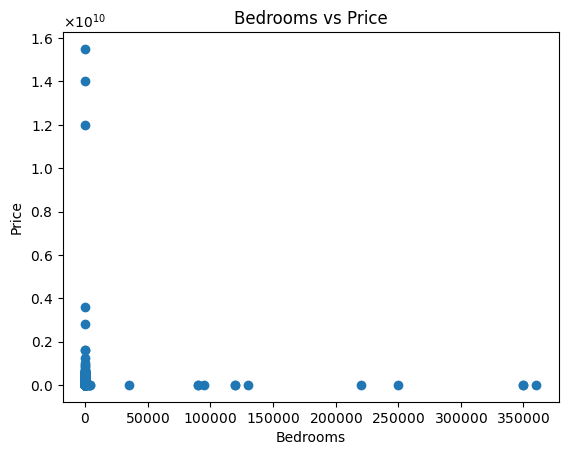

In [106]:
plt.scatter(data['Bedrooms'], data['Price'])
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.show()

In [107]:
data['Bedrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bedrooms
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [108]:
Q1 = np.percentile(data['Bedrooms'], 25, method='midpoint')
Q3 = np.percentile(data['Bedrooms'], 75, method='midpoint')

IQR = Q3 -  Q1
print(Q1, Q3)

2.0 4.0


In [109]:
upper =  Q3 + 1.5 * IQR
lower =   Q1 - 1.5 * IQR
upper_array = np.array(data['Bedrooms'] >= upper)
lower_array = np.array(data['Bedrooms'] <= lower)

print(lower, upper)
print(f'Lower bond values {lower_array.sum()}, Upper bond values {upper_array.sum()}')

-1.0 7.0
Lower bond values 0, Upper bond values 1902


In [110]:
data['Bedrooms'].median()

3.0

In [111]:
upper_array

array([False, False, False, ..., False, False, False])

In [112]:
np.unique(upper_array)

array([False,  True])

In [113]:
data.loc[upper_array, 'Bedrooms'] = data['Bedrooms'].median()

In [114]:
data['Bedrooms'].describe()

count    231057.000000
mean          3.234250
std           1.249039
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: Bedrooms, dtype: float64

<Axes: >

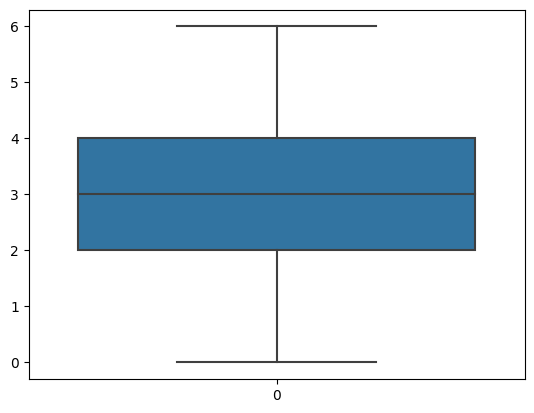

In [115]:
sns.boxplot(data['Bedrooms'])

## Bathrooms

In [116]:
data['Bathrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bathrooms
Non-Null Count   Dtype  
--------------   -----  
221926 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [117]:
data['Bathrooms'].fillna(data['Bathrooms'].median(), inplace=True)

In [118]:
data['Bathrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bathrooms
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [119]:
data['Bathrooms'].describe()

count    2.310570e+05
mean     1.207602e+02
std      4.836223e+04
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.323232e+07
Name: Bathrooms, dtype: float64

<Axes: >

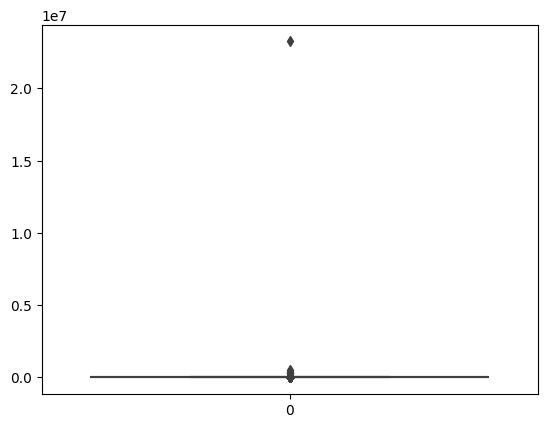

In [120]:
sns.boxplot(data['Bathrooms'])

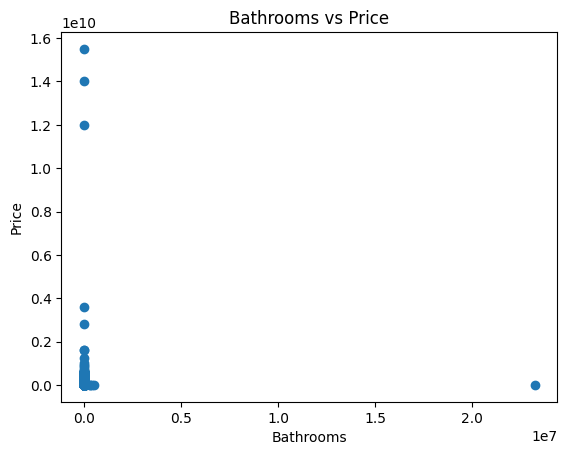

In [121]:
plt.scatter(data['Bathrooms'], data['Price'])
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [122]:
Q1 = np.percentile(data['Bathrooms'], 25, method='midpoint')
Q3 = np.percentile(data['Bathrooms'], 75, method='midpoint')

IQR = Q3 - Q1

In [123]:
upper =  Q3 + 1.5 * IQR
lower =   Q1 - 1.5 * IQR
upper_array = np.array(data['Bathrooms'] >= upper)
lower_array = np.array(data['Bathrooms'] <= lower)

print(lower, upper)
print(f'Lower bond values {lower_array.sum()}, Upper bond values {upper_array.sum()}')

-1.0 7.0
Lower bond values 0, Upper bond values 4996


In [124]:
data.loc[upper_array, 'Bathrooms'] = data['Bathrooms'].median()

In [125]:
data['Bathrooms'].describe()

count    231057.00000
mean          3.20578
std           1.34054
min           0.00000
25%           2.00000
50%           3.00000
75%           4.00000
max           6.00000
Name: Bathrooms, dtype: float64

<Axes: >

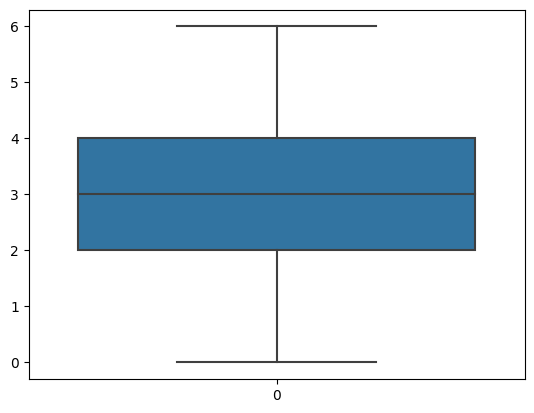

In [126]:
sns.boxplot(data['Bathrooms'])

## Parking

In [127]:
data['Parking'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Parking
Non-Null Count   Dtype  
--------------   -----  
107061 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [128]:
data['Parking'].value_counts()

2.0          65841
3.0          14380
1.0           9379
4.0           9306
5.0           4778
             ...  
310.0            1
789.0            1
85.0             1
750.0            1
1121111.0        1
Name: Parking, Length: 258, dtype: int64

In [129]:
data['Parking'].describe()

count    1.070610e+05
mean     2.430523e+01
std      3.502559e+03
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.121111e+06
Name: Parking, dtype: float64

<Axes: >

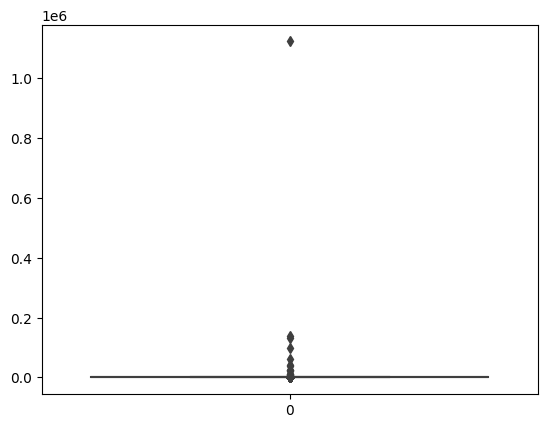

In [130]:
sns.boxplot(data['Parking'])

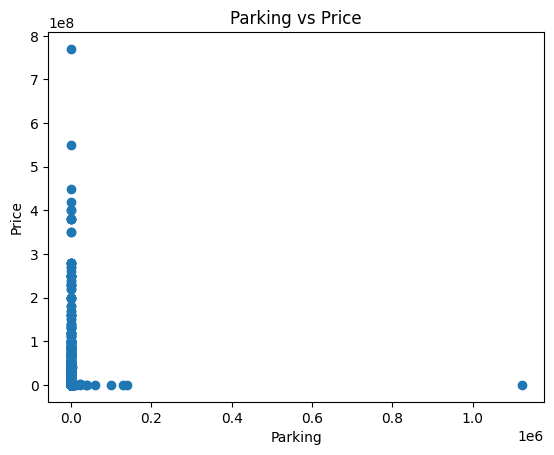

In [131]:
plt.scatter(data['Parking'], data['Price'])
plt.title('Parking vs Price')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.show()

In [132]:
mode_parking = data['Parking'].mode().values[0]
print(mode_parking)

2.0


In [133]:

for idx, val in enumerate(data['Parking']):
  if pd.isnull(val):
    if data.at[idx, 'Bedrooms']:
      data.at[idx, 'Parking'] = 0
    else:
      data.at[idx, 'Parking'] = mode_parking

In [134]:
data['Parking'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Parking
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [135]:
data['Parking'].value_counts()

0.0          124447
2.0           65851
3.0           14380
1.0            9379
4.0            9306
              ...  
310.0             1
789.0             1
85.0              1
750.0             1
1121111.0         1
Name: Parking, Length: 258, dtype: int64

In [136]:
Q1 = np.percentile(data['Parking'], 25, method='midpoint')
Q3 = np.percentile(data['Parking'], 75, method='midpoint')

IQR = Q3 - Q1
print(IQR)

2.0


In [137]:
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

upper_array = np.array(data['Parking'] >= upper)
lower_array = np.array(data['Parking'] <= lower)

print(lower, upper)
print(f'Sum of values less than lower bound{lower_array.sum()} and those greater than upper bound {upper_array.sum()}')

-3.0 5.0
Sum of values less than lower bound0 and those greater than upper bound 7694


In [138]:
data.loc[upper_array, 'Parking'] = data['Parking'].median()

In [139]:
data['Parking'].describe()

count    231057.000000
mean          0.958400
std           1.211032
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           4.000000
Name: Parking, dtype: float64

In [140]:
data['Parking'].value_counts()

0.0    132141
2.0     65851
3.0     14380
1.0      9379
4.0      9306
Name: Parking, dtype: int64

## Price

In [141]:
data['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Price
Non-Null Count   Dtype  
--------------   -----  
230942 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [142]:
data['Price'].value_counts()

250000.0     13528
350000.0     10986
150000.0     10687
200000.0     10084
300000.0      9781
             ...  
418800.0         1
231710.0         1
221445.0         1
1057000.0        1
89996.0          1
Name: Price, Length: 1741, dtype: int64

In [143]:
data['Price'].describe()

count    2.309420e+05
mean     8.868090e+05
std      5.224872e+07
min      0.000000e+00
25%      8.000000e+04
50%      1.500000e+05
75%      2.800000e+05
max      1.550006e+10
Name: Price, dtype: float64

In [144]:
data['Price'].isnull().sum()

115

In [145]:
data['Price'].fillna(data['Price'].median(), inplace=True)
print(data['Price'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Price
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
None


<Axes: >

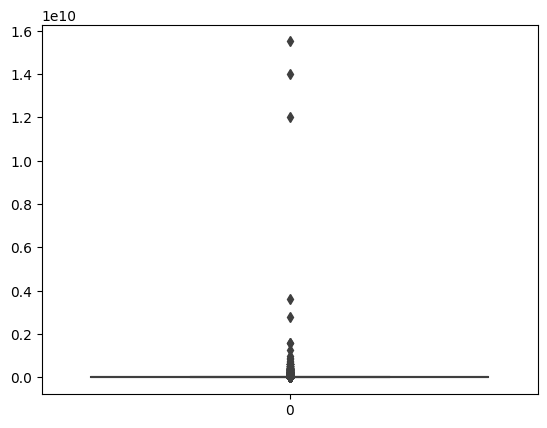

In [146]:
sns.boxplot(data['Price'])

In [147]:
Q1 = np.percentile(data['Price'], 25, method='midpoint')
Q3 = np.percentile(data['Price'], 75, method='midpoint')

IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 80000.0, Q3: 280000.0, IQR: 200000.0


In [148]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower, upper)

-220000.0 580000.0


In [149]:
upper_array = np.array(data['Price'] >= upper)
lower_array = np.array(data['Price'] <= lower)

In [150]:
print(len(lower_array), len(upper_array))

231057 231057


In [151]:
data['Price'].median()

150000.0

In [152]:
data.loc[lower_array, 'Price'] = data['Price'].median()
data.loc[upper_array, 'Price'] = data['Price'].median()

In [153]:
data['Price'].describe()

count    231057.000000
mean     179259.512341
std      122274.723709
min           0.000000
25%       80000.000000
50%      150000.000000
75%      250000.000000
max      579800.000000
Name: Price, dtype: float64

<Axes: >

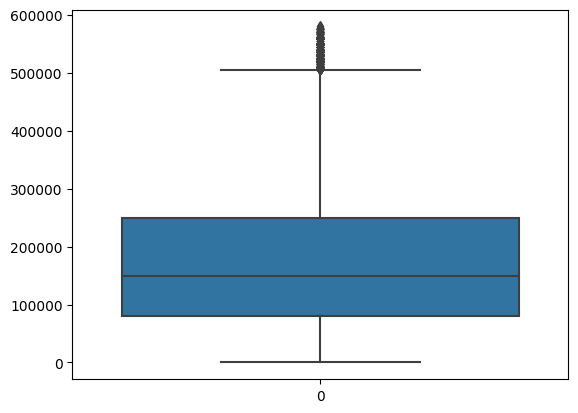

In [154]:
sns.boxplot(data['Price'])

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       231057 non-null  object 
 1   Location   231057 non-null  object 
 2   Bedrooms   231057 non-null  float64
 3   Bathrooms  231057 non-null  float64
 4   Parking    231057 non-null  float64
 5   Price      231057 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


## Distributions

### Bedrooms

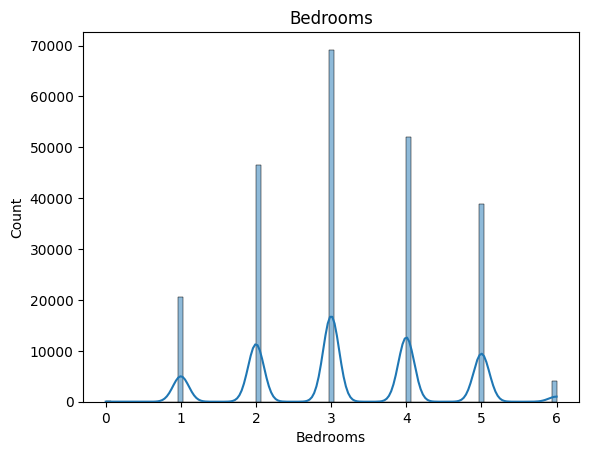

In [161]:
sns.histplot(data=data['Bedrooms'], kde=True)
plt.title("Bedrooms")
plt.show()

## Bathrooms

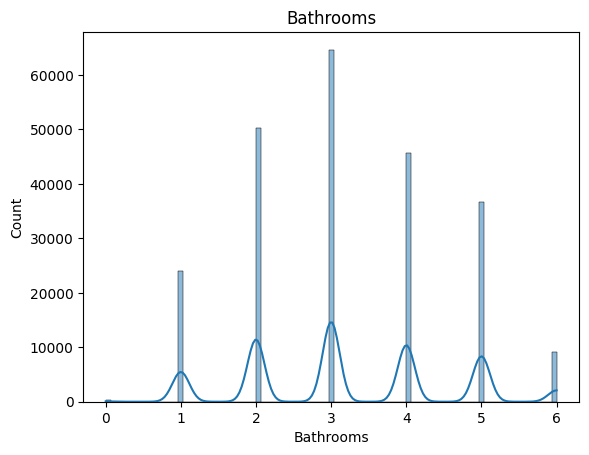

In [170]:
sns.histplot(data=data['Bathrooms'], kde=True)
plt.title('Bathrooms')
plt.show()

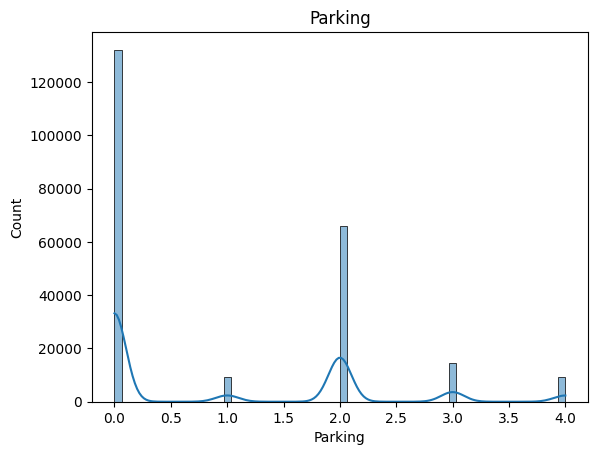

In [171]:
sns.histplot(data=data['Parking'], kde=True)
plt.title('Parking')
plt.show()

### Price

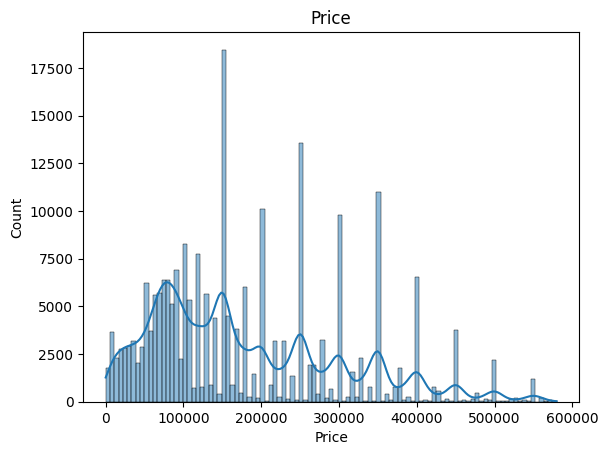

In [172]:
sns.histplot(data=data['Price'], kde=True)
plt.title("Price")
plt.show()

In [173]:
data['Price'].describe()

count    231057.000000
mean     179259.512341
std      122274.723709
min           0.000000
25%       80000.000000
50%      150000.000000
75%      250000.000000
max      579800.000000
Name: Price, dtype: float64

In [175]:
data[data['Price']== 0].value_counts()

City     Location    Bedrooms  Bathrooms  Parking  Price
Nairobi  Kileleshwa  0.0       0.0        0.0      0.0      1
         Kilimani    0.0       0.0        0.0      0.0      1
         Lavington   0.0       0.0        0.0      0.0      1
         Westlands   0.0       0.0        0.0      0.0      1
dtype: int64